In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv2D,Conv2DTranspose, MaxPooling2D,Dropout,concatenate,ZeroPadding2D
from keras.optimizers import Adam,SGD
from keras.utils import plot_model
import glob

In [3]:
base_dir = "../input/handwriting-reconstruction/v6/"

In [4]:
def process_image(image):
    return image/255

In [5]:
filenames = glob.glob("../input/handwriting-reconstruction/v6/input/*.jpg")
filenames.sort()
input_img = [cv2.imread(img) for img in filenames]

In [6]:
filenames = glob.glob("../input/handwriting-reconstruction/v6/output/*.jpg")
filenames.sort()
output_img = [cv2.imread(img) for img in filenames]

In [7]:
ip_images=[]
op_images=[]

In [8]:
for img in input_img:
    img=process_image(img)
    img=cv2.resize(img,(256,64))
    ip_images.append(img)

In [9]:
for img in output_img:
    img=process_image(img)
    img=cv2.resize(img,(256,32))
    op_images.append(img)

In [10]:
ip_images=np.asarray(ip_images)


In [11]:
op_images=np.asarray(op_images)

In [35]:
ip_images.shape

(10000, 64, 256, 3)

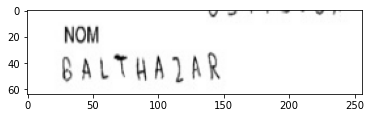

In [13]:
plt.imshow(ip_images[0])

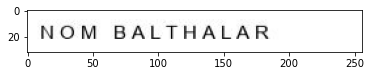

In [14]:
plt.imshow(op_images[0])

In [15]:
from sklearn.model_selection import train_test_split

In [43]:
train_x=ip_images[:2000]
test_x=ip_images[3000:3200]
train_y=op_images[:2000]
test_y=op_images[3000:3200]

In [17]:
def res(prev_layer):
    l1=Conv2D(64,(3,3),activation='relu')(prev_layer)
    l2=Conv2D(64,(3,3),activation='relu',padding='same')(l1)
    l3=Conv2D(64,(3,3),activation='relu',padding='same')(l2)
    l4=concatenate([l1,l3])
    l4=ZeroPadding2D(padding=(1, 1))(l4)
    l5=Conv2D(64,(3,3),activation='relu',padding='same')(l4)
    l6=concatenate([prev_layer,l5])
    l6=ZeroPadding2D(padding=(1, 1))(l6)
    
    return l6

In [18]:
inp=Input(shape=(64,256,3))
l1=Conv2D(64,(3,3),activation='relu',padding='same')(inp)
l2=res(l1)
l2=res(l2)
l3=res(l2)
l3=res(l3)
l8=res(l3)
l8=res(l8)
l9=res(l8)
l9=res(l9)
l10=res(l9)
l11=res(l10)
l12=res(l11)
out=Conv2D(3,(3,3),activation='relu')(l12)
out=Conv2D(3,(3,3),activation='relu')(out)
out=Conv2D(3,(3,3),activation='relu')(out)
out=Conv2D(3,(3,3),activation='relu')(out)
out=Conv2D(3,(3,3),activation='relu')(out)
out=Conv2D(3,(3,3),activation='relu')(out)
out=Conv2D(3,(3,3),activation='relu')(out)
out=Conv2D(3,(3,3),activation='relu')(out)
out=Conv2D(3,(3,3),activation='relu')(out)
out=Conv2D(3,(3,3),activation='relu')(out)
out=Conv2D(3,(3,3),activation='relu')(out)
out=MaxPooling2D(pool_size=(2,1))(out)
model=Model(inputs=[inp],outputs=out)
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 256, 3)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 256, 64)  1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 254, 64)  36928       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 62, 254, 64)  36928       conv2d_1[0][0]                   
______________________________________________________________________________________________

In [19]:
import math
from keras import backend as K
def ssim(original_image, generated_image):
    
    original_image = tf.convert_to_tensor(original_image, dtype = tf.float32)
    generated_image = tf.convert_to_tensor(generated_image, dtype = tf.float32)
    
    ssim = tf.image.ssim(original_image, generated_image, max_val = 1.0, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, )
    
    return tf.math.reduce_mean(ssim, axis = None, keepdims = False, name = None)

def PSNR(y_true, y_pred):
    max_pixel = 1.0
    return (10.0 * K.log((max_pixel ** 2) / (K.mean(K.square(y_pred - y_true), axis=-1)))) / 2.303
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[PSNR,ssim])

In [20]:
model.fit(train_x,train_y, epochs=15,batch_size=2)

Epoch 1/15
1000/1000 [==============================] - 142s 132ms/step - loss: 0.2949 - PSNR: inf - ssim: 0.4269
Epoch 2/15
1000/1000 [==============================] - 132s 132ms/step - loss: 0.0200 - PSNR: 30.7066 - ssim: 0.6234
Epoch 3/15
1000/1000 [==============================] - 132s 132ms/step - loss: 0.0179 - PSNR: 34.0062 - ssim: 0.5810
Epoch 4/15
1000/1000 [==============================] - 132s 132ms/step - loss: 0.0172 - PSNR: 34.7954 - ssim: 0.5973
Epoch 5/15
1000/1000 [==============================] - 132s 132ms/step - loss: 0.0169 - PSNR: 34.6089 - ssim: 0.6030
Epoch 6/15
1000/1000 [==============================] - 132s 132ms/step - loss: 0.0176 - PSNR: 32.9725 - ssim: 0.5785
Epoch 7/15
1000/1000 [==============================] - 132s 132ms/step - loss: 0.0165 - PSNR: 34.5449 - ssim: 0.6053
Epoch 8/15
1000/1000 [==============================] - 132s 132ms/step - loss: 0.0165 - PSNR: 35.5546 - ssim: 0.6091
Epoch 9/15
1000/1000 [==============================] - 132s

In [21]:
y_pred=model.predict(test_x)

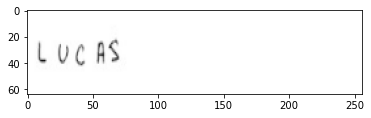

In [57]:
plt.imshow(test_x[0])

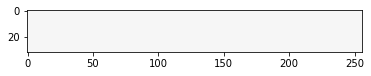

In [22]:
plt.imshow(y_pred[0])

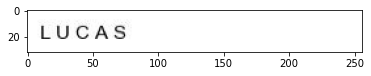

In [23]:
plt.imshow(test_y[0])

In [45]:
inp=Input(shape=(64,256,3))
l1=Conv2D(64,(3,3),activation='relu',padding='same')(inp)
l2=res(l1)
l2=UpSampling2D()(l2)
l2=MaxPooling2D()(l2)
l3=res(l2)
l3=UpSampling2D()(l3)
l3=MaxPooling2D()(l3)
l8=res(l3)
l8=UpSampling2D()(l8)
l8=MaxPooling2D()(l8)
l9=res(l8)
l9=UpSampling2D()(l9)
l9=MaxPooling2D()(l9)
l10=res(l9)
l10=UpSampling2D()(l10)
l10=MaxPooling2D()(l10)
l11=res(l10)
l11=UpSampling2D()(l11)
l11=MaxPooling2D()(l11)
l12=res(l11)
out=Conv2D(3,(3,3),activation='relu')(l12)
out=Conv2D(3,(3,3),activation='relu')(out)
out=Conv2D(3,(3,3),activation='relu')(out)
out=Conv2D(3,(3,3),activation='relu')(out)
out=Conv2D(3,(3,3),activation='relu')(out)
out=Conv2D(3,(3,3),activation='relu')(out)
out=Conv2D(3,(3,3),activation='relu')(out)
out=MaxPooling2D(pool_size=(2,1))(out)
model2=Model(inputs=[inp],outputs=out)
model2.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 64, 256, 3)] 0                                            
__________________________________________________________________________________________________
conv2d_158 (Conv2D)             (None, 64, 256, 64)  1792        input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_159 (Conv2D)             (None, 62, 254, 64)  36928       conv2d_158[0][0]                 
__________________________________________________________________________________________________
conv2d_160 (Conv2D)             (None, 62, 254, 64)  36928       conv2d_159[0][0]                 
____________________________________________________________________________________________

In [46]:
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=[PSNR,ssim])

In [47]:
hist=model2.fit(train_x, train_y, epochs=6,batch_size=2)

Epoch 1/6
1000/1000 [==============================] - 110s 107ms/step - loss: 0.1935 - PSNR: inf - ssim: 0.3826
Epoch 2/6
1000/1000 [==============================] - 107s 107ms/step - loss: 0.0182 - PSNR: 29.6252 - ssim: 0.5333
Epoch 3/6
1000/1000 [==============================] - 107s 107ms/step - loss: 0.0183 - PSNR: 30.2189 - ssim: 0.5348
Epoch 4/6
1000/1000 [==============================] - 107s 107ms/step - loss: 0.0177 - PSNR: 31.4271 - ssim: 0.5503
Epoch 5/6
1000/1000 [==============================] - 107s 107ms/step - loss: 0.0178 - PSNR: 31.0376 - ssim: 0.5308
Epoch 6/6
1000/1000 [==============================] - 107s 107ms/step - loss: 0.0168 - PSNR: 32.8188 - ssim: 0.5874


In [52]:
model2.evaluate(test_x,test_y)

7/7 [==============================] - 4s 490ms/step - loss: 0.0161 - PSNR: 32.3630 - ssim: 0.6047


[0.016115743666887283, 32.362979888916016, 0.6046648621559143]

In [78]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import tensorflow as tf

def build_model():
    input_img = Input(shape=(64, 256, 3))
    l1 = Conv2D(64, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(input_img)
    l2 = Conv2D(64, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(l1)

    l3 = MaxPooling2D(padding='same')(l2)
    l3 = Dropout(0.3)(l3)
    l4 = Conv2D(128, (3, 3),  padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(l3)
    l5 = Conv2D(128, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(l4)

    l6 = MaxPooling2D(padding='same')(l5)
    l7 = Conv2D(256, (3, 3), padding='same', activation='relu', 
                activity_regularizer=regularizers.l1(10e-10))(l6)
    
    l8 = UpSampling2D()(l7)

    l9 = Conv2D(128, (3, 3), padding='same', activation='relu',
                activity_regularizer=regularizers.l1(10e-10))(l8)
    l10 = Conv2D(128, (3, 3), padding='same', activation='relu',
                 activity_regularizer=regularizers.l1(10e-10))(l9)

    l11 = add([l5, l10])
    l12 = UpSampling2D()(l11)
    l13 = Conv2D(64, (3, 3), padding='same', activation='relu',
                 activity_regularizer=regularizers.l1(10e-10))(l12)
    l14 = Conv2D(64, (3, 3), padding='same', activation='relu',
                 activity_regularizer=regularizers.l1(10e-10))(l13)

    l15 = add([l14, l2])
    

    decoded = Conv2D(3, (3, 3), padding='same', activation='relu', 
                     activity_regularizer=regularizers.l1(10e-10))(l15)
    out=MaxPooling2D(pool_size=(2,1))(decoded)


    model = Model(input_img, out)
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=[PSNR,ssim])
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=[PSNR,ssim])
    
    return model


In [54]:
auto=build_model()

In [ ]:
auto.fit(train_x, train_y, epochs = 50, batch_size = 8, shuffle = True)

Epoch 1/50
250/250 [==============================] - 10s 39ms/step - loss: 0.0068
Epoch 2/50
250/250 [==============================] - 10s 39ms/step - loss: 0.0067
Epoch 3/50
250/250 [==============================] - 10s 40ms/step - loss: 0.0067
Epoch 4/50
250/250 [==============================] - 10s 40ms/step - loss: 0.0068
Epoch 5/50
250/250 [==============================] - 10s 39ms/step - loss: 0.0068
Epoch 6/50
250/250 [==============================] - 10s 39ms/step - loss: 0.0067
Epoch 7/50
250/250 [==============================] - 10s 40ms/step - loss: 0.0068
Epoch 8/50
250/250 [==============================] - 10s 39ms/step - loss: 0.0067
Epoch 9/50
 61/250 [======>.......................] - ETA: 7s - loss: 0.0068

In [73]:
y_pd=auto.predict(test_x)

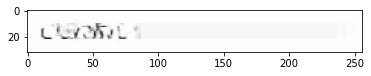

In [75]:
plt.imshow(y_pd[0])


In [79]:
auto2=build_model()

In [86]:
hist=auto2.fit(train_x, train_y, epochs = 10, batch_size = 8, shuffle = True)

Epoch 1/50
250/250 [==============================] - 10s 40ms/step - loss: 0.0105 - PSNR: inf - ssim: 0.7311
Epoch 2/50
250/250 [==============================] - 10s 40ms/step - loss: 0.0105 - PSNR: inf - ssim: 0.7315
Epoch 3/50
250/250 [==============================] - 10s 40ms/step - loss: 0.0104 - PSNR: inf - ssim: 0.7325
Epoch 4/50
250/250 [==============================] - 10s 40ms/step - loss: 0.0104 - PSNR: inf - ssim: 0.7334
Epoch 5/50
250/250 [==============================] - 10s 40ms/step - loss: 0.0103 - PSNR: inf - ssim: 0.7347
Epoch 6/50
250/250 [==============================] - 10s 40ms/step - loss: 0.0103 - PSNR: inf - ssim: 0.7359
Epoch 7/50
250/250 [==============================] - 10s 40ms/step - loss: 0.0102 - PSNR: inf - ssim: 0.7364
Epoch 8/50
250/250 [==============================] - 10s 40ms/step - loss: 0.0102 - PSNR: inf - ssim: 0.7374
Epoch 9/50
250/250 [==============================] - 10s 40ms/step - loss: 0.0101 - PSNR: inf - ssim: 0.7395
Epoch 10/5

In [87]:
y_pd=auto2.predict(test_x)

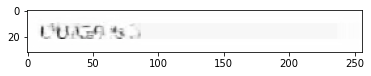

In [88]:
plt.imshow(y_pd[0])